In [190]:
import numpy as np
import matplotlib.pyplot as plt

sample_rate = 1e6
N = 10000 # number of samples to simulate

# Create a tone to act as the transmitter signal
t = np.arange(N)/sample_rate # time vector
f_tone = 0.02e6
tx = np.exp(2j * np.pi * f_tone * t)


In [210]:
tx

array([[1.        +0.j        ],
       [0.9921147 +0.12533323j],
       [0.96858316+0.24868989j],
       ...,
       [0.92977649-0.36812455j],
       [0.96858316-0.24868989j],
       [0.9921147 -0.12533323j]])

In [191]:
d = 0.5 # half wavelength spacing
Nr = 5
theta_degrees = 93 # direction of arrival (feel free to change this, it's arbitrary)
theta = theta_degrees / 180 * np.pi # convert to radians
a = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta)) # Steering Vector
print(a) # note that it's 3 elements long, it's complex, and the first element is 1+0j

[ 1.        +0.j         -0.99999073-0.00430543j  0.99996293+0.00861078j
 -0.99991659-0.01291597j  0.99985171+0.01722092j]


In [192]:
a = a.reshape(-1,1)
print(a.shape) # 3x1
tx = tx.reshape(-1,1)
print(tx.shape) # 10000x1

# matrix multiply
r = a @ tx.T  # dont get too caught up by the transpose, the important thing is we're multiplying the Steering Vector by the tx signal
print(r.shape) # 3x10000.  r is now going to be a 2D array, 1D is time and 1D is the spatial dimension
n = np.random.randn(Nr, N) + 1j*np.random.randn(Nr, N)
r = r + 0.5*n # r and n are both 3x10000


(5, 1)
(10000, 1)
(5, 10000)


In [211]:
n

array([[-0.86517806+0.46203587j,  0.58083315-0.15917023j,
         0.65450963+0.36218659j, ..., -1.1484858 -0.29868728j,
        -0.94332278+0.53045602j, -0.66601691+1.03208877j],
       [ 0.17851885+1.2148276j ,  0.69084252+0.61673671j,
        -0.83248341-0.10677487j, ...,  0.66616625+1.24719408j,
         0.40610448+0.17601905j, -0.37776842-1.71601547j],
       [-0.46629558+0.87859189j, -1.18357018+0.55203077j,
        -0.14098743+0.02253585j, ..., -0.33482084+0.54463418j,
         0.29305201-1.07298319j,  0.03043168+1.41607977j],
       [ 0.29302705-0.28942103j, -0.49010918+1.65084258j,
        -0.10873441-0.12657223j, ...,  0.52938278-2.15480517j,
        -2.93126555+0.27827765j,  0.53057433-0.08593068j],
       [ 1.35397858+1.2408264j , -1.17058321-1.82634052j,
         0.57350594+0.64391707j, ...,  0.71711253+0.5656041j ,
         0.29394387+0.09607966j, -0.2966431 -0.0287337j ]])

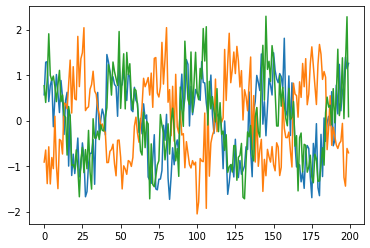

In [193]:
plt.plot(np.asarray(r[0,:]).squeeze().real[0:200]) # the asarray and squeeze are just annoyances we have to do because we came from a matrix
plt.plot(np.asarray(r[1,:]).squeeze().real[0:200])
plt.plot(np.asarray(r[2,:]).squeeze().real[0:200])
plt.show()

In [194]:
num_expected_signals = 3

In [214]:
r.shape

(5, 10000)

In [195]:
R = r @ r.conj().T
R

array([[ 14913.80086035 +0.j        ,  -9871.50432472 -5.33105772j,
         10024.57989801-57.29554382j,  -9966.35920974+89.82775469j,
          9932.54079   +23.76124056j],
       [ -9871.50432472 +5.33105772j,  14924.63375926 +0.j        ,
         -9951.75994262+92.45731041j,   9972.32798707-67.41943574j,
         -9992.07243625-11.05863105j],
       [ 10024.57989801+57.29554382j,  -9951.75994262-92.45731041j,
         14970.49206519 +0.j        , -10004.40148323+73.47227084j,
          9997.78472914+33.21183154j],
       [ -9966.35920974-89.82775469j,   9972.32798707+67.41943574j,
        -10004.40148323-73.47227084j,  15053.92280003 +0.j        ,
        -10040.05178328-58.07342866j],
       [  9932.54079   -23.76124056j,  -9992.07243625+11.05863105j,
          9997.78472914-33.21183154j, -10040.05178328+58.07342866j,
         14969.0815517  +0.j        ]])

In [196]:
w, v = np.linalg.eig(R) # eigenvalue decomposition, v[:,i] is the eigenvector corresponding to the eigenvalue w[i]
w.shape, v.shape

((5,), (5, 5))

In [197]:
v

array([[-0.44577289+0.00362981j,  0.51419842+0.j        ,
        -0.47194058+0.14272694j,  0.08658168-0.50871984j,
        -0.08294519+0.14353496j],
       [ 0.445801  -0.00395659j,  0.39409418+0.29718162j,
         0.11025758-0.34211851j, -0.46604907-0.34630159j,
         0.28235372-0.10754865j],
       [-0.44793651+0.00160965j,  0.4443577 -0.00331157j,
         0.66608084+0.j        ,  0.14453769+0.13815382j,
         0.11501122-0.32406277j],
       [ 0.44873426+0.j        ,  0.24753819-0.35766523j,
        -0.1094464 +0.1402085j ,  0.58724824+0.j        ,
         0.4774213 -0.07077753j],
       [-0.44776472+0.00371279j, -0.31912538-0.05888581j,
        -0.19502855-0.33817532j, -0.10668466+0.01901216j,
         0.72804029+0.j        ]])

In [198]:
eig_val_order = np.argsort(np.abs(w)) # find order of magnitude of eigenvalues
eig_val_order

array([2, 4, 3, 1, 0])

In [199]:
v = v[:, eig_val_order] # sort eigenvectors using this order
v

array([[-0.47194058+0.14272694j, -0.08294519+0.14353496j,
         0.08658168-0.50871984j,  0.51419842+0.j        ,
        -0.44577289+0.00362981j],
       [ 0.11025758-0.34211851j,  0.28235372-0.10754865j,
        -0.46604907-0.34630159j,  0.39409418+0.29718162j,
         0.445801  -0.00395659j],
       [ 0.66608084+0.j        ,  0.11501122-0.32406277j,
         0.14453769+0.13815382j,  0.4443577 -0.00331157j,
        -0.44793651+0.00160965j],
       [-0.1094464 +0.1402085j ,  0.4774213 -0.07077753j,
         0.58724824+0.j        ,  0.24753819-0.35766523j,
         0.44873426+0.j        ],
       [-0.19502855-0.33817532j,  0.72804029+0.j        ,
        -0.10668466+0.01901216j, -0.31912538-0.05888581j,
        -0.44776472+0.00371279j]])

In [200]:
# We make a new eigenvector matrix representing the "noise subspace", it's just the rest of the eigenvalues
V = np.zeros((Nr, Nr - num_expected_signals), dtype=np.complex64)
V

array([[0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]], dtype=complex64)

In [201]:
for i in range(Nr - num_expected_signals):
   V[:, i] = v[:, i]
V

array([[-0.47194058+0.14272694j, -0.08294518+0.14353496j],
       [ 0.11025757-0.3421185j ,  0.28235373-0.10754865j],
       [ 0.66608083+0.j        ,  0.11501122-0.32406276j],
       [-0.1094464 +0.1402085j ,  0.4774213 -0.07077753j],
       [-0.19502854-0.33817533j,  0.7280403 +0.j        ]],
      dtype=complex64)

In [202]:
theta_scan = np.linspace(-1*np.pi, np.pi, 1000) # -180 to +180 degrees
theta_scan.shape

(1000,)

In [203]:
results = []
arrival_angle = theta_scan[0]
max_power = -9999
angles = []
for theta_i in theta_scan:
    a = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta_i)) # Steering Vector
    a = a.reshape(-1,1)
    metric = 1 / (a.conj().T @ V @ V.conj().T @ a) # The main MUSIC equation
    metric = np.abs(metric.squeeze()) # take magnitude
    metric = 10*np.log10(metric) # convert to dB
    if metric > max_power:
        max_power = metric
        arrival_angle = theta_i
        angles.append(theta_i)
        print(metric, arrival_angle)
    results.append(metric)



-4.14423320477 -3.141592653589793
-4.139723029296823 -2.9466189353489853
-4.131596821625277 -2.940329460567024
-4.124871104400797 -2.934039985785062
-4.119742265748679 -2.9277505110031004
-4.116400899560732 -2.921461036221139
-4.115029983466645 -2.9151715614391773
-4.056359963451182 -2.267355658897138
-3.9371512124332613 -2.2610661841151765
-3.815115516334599 -2.254776709333215
-3.690250345717519 -2.2484872345512534
-3.5625524089435894 -2.242197759769292
-3.432017615317602 -2.2359082849873304
-3.298641037397812 -2.229618810205369
-3.1624168723556507 -2.223329335423407
-3.023338402265508 -2.217039860641446
-2.881397953202508 -2.210750385859484
-2.736586853022915 -2.2044609110775224
-2.588895387697183 -2.198171436295561
-2.438312756061324 -2.1918819615135994
-2.284827022846539 -2.185592486731638
-2.128425069840482 -2.1793030119496763
-1.9690925450269272 -2.173013537167715
-1.806813809542054 -2.1667240623857533
-1.6415718822770244 -2.160434587603792
-1.4733483819463102 -2.1541451128218303

In [204]:
results /= np.max(results) # normalize

In [205]:
np.max(results)

1.0

In [208]:
angles[-2] * 180 / np.pi

-90.27027027027027

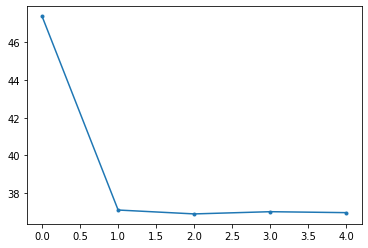

In [207]:
plt.plot(10*np.log10(np.abs(w)),'.-')